In [67]:
from os import path
import os
import pandas as pd
import numpy as np
import requests, zipfile, io, os
pd.set_option('display.max_colwidth', -1)
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import re
import seaborn as sns

C:\Users\INGRID~1.CHA\AppData\Local\Temp/ipykernel_22532/3265537112.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [68]:
df_results = pd.read_csv('AllRegion_Results.csv') 
df_results

,Location Name,Coordinates,URL for files,WMO,last_year,Country,State/Province,Station,WBAN,Latitude,...,Evaporation WB 0.4%,Evaporation MCDB 0.4%,Evaporation WB 1%,Evaporation MCDB 1%,Evaporation WB 2%,Evaporation MCDB 2%,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW
0,Esperanza.Base-Hope.Bay ARG ATA,"['-56.99730', '-63.39810', '3.0']",https://climate.onebuilding.org/WMO_Region_7_Antarctica/ATA_Antarctica/ATA_ARG_Esperanza.Base-Hope.Bay.889630_TMYx.2004-2018.zip,889630,2018,Antarctica,NaN,BASE ESPERANZA,99999,63.3989S,...,4.7,7.5,3.9,6.4,3.2,5.4,-25.4000,-22.700,8.0000,6.900
1,Esperanza.Base-Hope.Bay ARG ATA,"['-56.99730', '-63.39810', '3.0']",https://climate.onebuilding.org/WMO_Region_7_Antarctica/ATA_Antarctica/ATA_ARG_Esperanza.Base-Hope.Bay.889630_TMYx.2007-2021.zip,889630,2021,Antarctica,NaN,BASE ESPERANZA,99999,63.3989S,...,4.7,7.5,3.9,6.4,3.2,5.4,-22.8964,-21.100,7.6000,6.741
2,Esperanza.Base-Hope.Bay ARG ATA,"['-56.99730', '-63.39810', '3.0']",https://climate.onebuilding.org/WMO_Region_7_Antarctica/ATA_Antarctica/ATA_ARG_Esperanza.Base-Hope.Bay.889630_TMYx.zip,889630,TMYx,Antarctica,NaN,BASE ESPERANZA,99999,63.3989S,...,4.7,7.5,3.9,6.4,3.2,5.4,-22.2964,-21.300,7.3000,6.200
3,Orcadas.Base-Laurie.Island-South.Orkney.Islands ARG ATA,"['-44.73300', '-60.73300', '8.0']",https://climate.onebuilding.org/WMO_Region_7_Antarctica/ATA_Antarctica/ATA_ARG_Orcadas.Base-Laurie.Island-South.Orkney.Islands.889680_TMYx.2004-2018.zip,889680,2018,Antarctica,NaN,BASE ORCADAS,99999,60.7378S,...,4.1,5.3,3.4,4.3,2.8,3.6,-26.8000,-24.241,5.3964,4.300
4,Orcadas.Base-Laurie.Island-South.Orkney.Islands ARG ATA,"['-44.73300', '-60.73300', '8.0']",https://climate.onebuilding.org/WMO_Region_7_Antarctica/ATA_Antarctica/ATA_ARG_Orcadas.Base-Laurie.Island-South.Orkney.Islands.889680_TMYx.2007-2021.zip,889680,2021,Antarctica,NaN,BASE ORCADAS,99999,60.7378S,...,4.1,5.3,3.4,4.3,2.8,3.6,-27.3964,-24.900,4.6000,3.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30458,Montreal-Mirabel Intl AP QC CAN,"['-74.03860', '45.68060', '82.3']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/QC_Quebec/CAN_QC_Montreal-Mirabel.Intl.AP.719050_CWEC2016.zip,719050,2016,Canada,QC,KUUJJUARAPIK,99999,55.282N,...,18.3,22.9,17.0,21.0,15.6,19.7,-24.9000,-21.700,28.8000,27.500
30459,Slave Lake AB CAN,"['-114.7800', '55.29000', '582.8']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/AB_Alberta/CAN_AB_Slave.Lake.713690_CWEC2020.zip,713690,2020,Canada,AB,SLAVE LAKE,99999,55.2964N,...,18.8,24.2,17.8,22.8,16.7,21.4,-27.3964,-25.300,26.4000,24.241
30460,Wainwright CFB Airfield AB CAN,"['-111.1000', '52.83000', '686.3']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/AB_Alberta/CAN_AB_Wainwright.CFB.Airfield.711180_CWEC2020.zip,711180,2020,Canada,AB,WAINWRIGHT CFB,99999,52.8305N,...,19.0,26.2,18.0,25.1,17.0,23.7,-28.7000,-26.300,29.8000,28.000
30461,Grand Etang NS CAN,"['-61.05000', '46.55000', '12.5']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/NS_Nova_Scotia/CAN_NS_Grand.Etang.730300_CWEC2020.zip,730300,2020,Canada,NS,GRAND ETANG,99999,46.550N,...,22.4,25.4,21.6,24.4,20.7,23.5,-12.3000,-11.500,26.1000,24.700


In [69]:
df_results['Location Name'].nunique()

11577

In [111]:
df_results['WMO'].nunique()

8823

In [70]:
df_results['Region_number'] = df_results['WMO'].astype(str).str[:2]

In [71]:
df_results= df_results.sort_values(by=['Region_number'], ascending=False)
df_results.drop(df_results.index[df_results['Region_number'] == 'WM'], inplace = True)
df_results['Region_number']= df_results['Region_number'].astype(str).astype(int,errors='ignore')
df_results.dtypes

Location Name             object 
Coordinates               object 
URL for files             object 
WMO                       int64  
last_year                 object 
Country                   object 
State/Province            object 
Station                   object 
WBAN                      int64  
Latitude                  object 
Longitude                 object 
Heating DB 99.6%          float64
Heating DB 99%            float64
Cooling DB 0.4%           float64
Cooling MCWB 0.4%         float64
Cooling DB 1%             float64
Cooling MCWB 1%           float64
Cooling DB 2%             float64
Cooling MCWB 2%           float64
Evaporation WB 0.4%       float64
Evaporation MCDB 0.4%     float64
Evaporation WB 1%         float64
Evaporation MCDB 1%       float64
Evaporation WB 2%         float64
Evaporation MCDB 2%       float64
Heating DB 99.6% - EPW    float64
Heating DB 99% - EPW      float64
Cooling DB 0.4% - EPW     float64
Cooling DB 1% - EPW       float64
Region_number 

In [72]:
df_results["Region"] = pd.cut(
    x=df_results["Region_number"],
    bins=[0, 29, 59,68,69,79,89,99, np.inf],
    labels=["Europe", "Asia", "Africa","special","North America","South America","Oceania","other"],
)
df_results

,Location Name,Coordinates,URL for files,WMO,last_year,Country,State/Province,Station,WBAN,Latitude,...,Evaporation WB 1%,Evaporation MCDB 1%,Evaporation WB 2%,Evaporation MCDB 2%,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,Region_number,Region
9253,St.Croix-Lime.Tree.Bay SC VIR,"['-64.75400', '17.69500', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/VIR_U_S_Virgin_Islands/VIR_SC_St.Croix-Lime.Tree.Bay.997349_TMYx.zip,997349,TMYx,USA,Virgin Islands,ST CROIX LIME TREE BAY,99999,17.695N,...,NaN,NaN,NaN,NaN,23.6000,23.900,31.1000,30.800,99,Oceania
22713,Cape.Canaveral-Trident.Wharf FL USA,"['-80.59300', '28.41600', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/FL_Florida/USA_FL_Cape.Canaveral-Trident.Wharf.997354_TMYx.2007-2021.zip,997354,2021,USA,FL,CAPE CANAVERAL TRIDENT PIER,99999,28.4160N,...,NaN,NaN,NaN,NaN,8.6036,9.800,31.5000,31.200,99,Oceania
22724,Eagle.Point TX USA,"['-94.92000', '29.48000', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/TX_Texas/USA_TX_Eagle.Point.997361_TMYx.2004-2018.zip,997361,2018,USA,TX,EAGLE POINT,99999,29.481N,...,NaN,NaN,NaN,NaN,4.6000,5.900,32.5000,31.700,99,Oceania
22723,Alpena MI USA,"['-83.42860', '45.06300', '179.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/MI_Michigan/USA_MI_Alpena.997359_TMYx.zip,997359,TMYx,USA,MI,ALPENA HARBOR,99999,45.0630N,...,NaN,NaN,NaN,NaN,-14.0000,-12.500,27.9964,25.700,99,Oceania
22722,Alpena.Harbor MI USA,"['-83.42860', '45.06300', '179.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/MI_Michigan/USA_MI_Alpena.Harbor.997359_TMYx.2007-2021.zip,997359,2021,USA,MI,ALPENA HARBOR,99999,45.0630N,...,NaN,NaN,NaN,NaN,-13.6000,-12.500,29.4000,26.841,99,Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.zip,103340,TMYx,Germany,NaN,WUNSTORF,99999,52.4606N,...,19.7,26.6,18.8,24.8,-9.0000,-6.041,30.0000,27.141,10,Europe
1234,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.2007-2021.zip,103340,2021,Germany,NaN,WUNSTORF,99999,52.4606N,...,19.7,26.6,18.8,24.8,-5.4964,-4.000,30.1964,28.000,10,Europe
1233,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.2004-2018.zip,103340,2018,Germany,NaN,WUNSTORF,99999,52.4606N,...,19.7,26.6,18.8,24.8,-5.0000,-4.200,28.2000,27.000,10,Europe
1232,Diepholz.Dummerland.AP HB DEU,"['8.34250', '52.58810', '43.1']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/HB_Bremen/DEU_HB_Diepholz.Dummerland.AP.103210_TMYx.zip,103210,TMYx,Germany,NaN,DIEPHOLZ,99999,52.5881N,...,19.7,25.5,18.8,24.0,-7.0000,-5.000,28.2000,26.841,10,Europe


In [73]:
df_results.describe()

,WMO,WBAN,Heating DB 99.6%,Heating DB 99%,Cooling DB 0.4%,Cooling MCWB 0.4%,Cooling DB 1%,Cooling MCWB 1%,Cooling DB 2%,Cooling MCWB 2%,...,Evaporation MCDB 0.4%,Evaporation WB 1%,Evaporation MCDB 1%,Evaporation WB 2%,Evaporation MCDB 2%,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,Region_number
count,30463.000000,30463.000000,30463.000000,30463.000000,30463.000000,29861.000000,30463.000000,29861.000000,30463.000000,29861.000000,...,29861.000000,29861.000000,29861.000000,29861.000000,29861.000000,30333.00000,30333.000000,30333.000000,30333.000000,30463.000000
mean,541267.499984,81299.214654,-10.790684,-8.652753,31.046023,20.247148,29.496839,19.778346,28.074454,19.287435,...,27.817069,21.321868,26.809337,20.562285,25.851318,-8.95827,-7.219351,30.274166,28.942464,58.363851
std,290351.089546,34257.230918,15.774868,15.156923,6.006473,4.035806,6.142362,4.204500,6.257797,4.360655,...,4.794108,4.432918,5.021448,4.571159,5.236214,15.28917,14.718851,6.144325,6.225572,24.407287
min,10010.000000,102.000000,-56.900000,-54.300000,-5.300000,-5.100000,-6.700000,-5.900000,-7.800000,-7.300000,...,-4.400000,-7.300000,-6.300000,-8.400000,-7.500000,-55.70000,-54.300000,-6.400000,-7.600000,10.000000
25%,293555.000000,93782.000000,-21.800000,-18.800000,28.100000,17.800000,26.200000,17.200000,24.500000,16.600000,...,25.400000,18.500000,24.100000,17.700000,22.800000,-19.39640,-17.000000,27.196400,25.700000,39.000000
50%,710470.000000,99999.000000,-10.500000,-8.000000,31.900000,20.200000,30.200000,19.600000,28.800000,19.000000,...,28.700000,21.200000,27.600000,20.400000,26.600000,-7.72000,-6.000000,31.000000,29.700000,71.000000
75%,725075.000000,99999.000000,-0.400000,1.000000,34.700000,23.300000,33.200000,23.000000,32.200000,22.700000,...,31.100000,25.000000,30.400000,24.300000,29.800000,0.90000,2.000000,34.000000,33.000000,72.000000
max,998235.000000,99999.000000,24.800000,25.300000,49.100000,29.800000,48.000000,29.800000,47.000000,29.600000,...,42.600000,32.800000,42.100000,31.600000,41.600000,26.72000,26.720000,58.000000,56.041000,99.000000


In [74]:
df_results.isnull().sum()

Location Name             0    
Coordinates               0    
URL for files             0    
WMO                       0    
last_year                 0    
Country                   0    
State/Province            18098
Station                   0    
WBAN                      0    
Latitude                  0    
Longitude                 0    
Heating DB 99.6%          0    
Heating DB 99%            0    
Cooling DB 0.4%           0    
Cooling MCWB 0.4%         602  
Cooling DB 1%             0    
Cooling MCWB 1%           602  
Cooling DB 2%             0    
Cooling MCWB 2%           602  
Evaporation WB 0.4%       602  
Evaporation MCDB 0.4%     602  
Evaporation WB 1%         602  
Evaporation MCDB 1%       602  
Evaporation WB 2%         602  
Evaporation MCDB 2%       602  
Heating DB 99.6% - EPW    130  
Heating DB 99% - EPW      130  
Cooling DB 0.4% - EPW     130  
Cooling DB 1% - EPW       130  
Region_number             0    
Region                    0    
dtype: i

In [75]:
cols= ['Heating DB 99.6% - EPW','Heating DB 99% - EPW','Cooling DB 0.4% - EPW','Cooling DB 1% - EPW']
df_results[cols].isnull().sum()

Heating DB 99.6% - EPW    130
Heating DB 99% - EPW      130
Cooling DB 0.4% - EPW     130
Cooling DB 1% - EPW       130
dtype: int64

In [76]:
df_results.dropna(subset=cols,inplace=True)
df_results[cols].isnull().sum()

Heating DB 99.6% - EPW    0
Heating DB 99% - EPW      0
Cooling DB 0.4% - EPW     0
Cooling DB 1% - EPW       0
dtype: int64

In [77]:
#check if temperature columns are numeric
df_results.dtypes
#if needed to convert temperatures to numeric
#cols = df_results.columns.drop(['Location Name','Coordinates','URL for files','WMO','last_year','Country','State/Province','Station','WBAN','Latitude','Longitude','Region_number','Region'])
#df_results[cols] = df_results[cols].apply(pd.to_numeric)

Location Name             object  
Coordinates               object  
URL for files             object  
WMO                       int64   
last_year                 object  
Country                   object  
State/Province            object  
Station                   object  
WBAN                      int64   
Latitude                  object  
Longitude                 object  
Heating DB 99.6%          float64 
Heating DB 99%            float64 
Cooling DB 0.4%           float64 
Cooling MCWB 0.4%         float64 
Cooling DB 1%             float64 
Cooling MCWB 1%           float64 
Cooling DB 2%             float64 
Cooling MCWB 2%           float64 
Evaporation WB 0.4%       float64 
Evaporation MCDB 0.4%     float64 
Evaporation WB 1%         float64 
Evaporation MCDB 1%       float64 
Evaporation WB 2%         float64 
Evaporation MCDB 2%       float64 
Heating DB 99.6% - EPW    float64 
Heating DB 99% - EPW      float64 
Cooling DB 0.4% - EPW     float64 
Cooling DB 1% - EPW 

In [78]:
filename = 'testFiles/test_01.csv'
export_csv = df_results.to_csv(filename, index = None, header=True)

In [79]:
#calculate difference btw ASHRAE design days and DD calculated from EPW
df_results['delta - Heating DB 99.6%'] = abs(df_results['Heating DB 99.6%'] - df_results['Heating DB 99.6% - EPW'])
df_results['delta - Heating DB 99%'] = abs(df_results['Heating DB 99%'] - df_results['Heating DB 99% - EPW'])
df_results['delta - Cooling DB 0.4%'] = abs(df_results['Cooling DB 0.4%'] - df_results['Cooling DB 0.4% - EPW'])
df_results['delta - Cooling DB 1%'] = abs(df_results['Cooling DB 1%'] - df_results['Cooling DB 1% - EPW'])
df_results

,Location Name,Coordinates,URL for files,WMO,last_year,Country,State/Province,Station,WBAN,Latitude,...,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,Region_number,Region,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
9253,St.Croix-Lime.Tree.Bay SC VIR,"['-64.75400', '17.69500', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/VIR_U_S_Virgin_Islands/VIR_SC_St.Croix-Lime.Tree.Bay.997349_TMYx.zip,997349,TMYx,USA,Virgin Islands,ST CROIX LIME TREE BAY,99999,17.695N,...,23.6000,23.900,31.1000,30.800,99,Oceania,0.3000,0.100,0.1000,0.100
22713,Cape.Canaveral-Trident.Wharf FL USA,"['-80.59300', '28.41600', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/FL_Florida/USA_FL_Cape.Canaveral-Trident.Wharf.997354_TMYx.2007-2021.zip,997354,2021,USA,FL,CAPE CANAVERAL TRIDENT PIER,99999,28.4160N,...,8.6036,9.800,31.5000,31.200,99,Oceania,2.5036,1.600,0.4000,0.100
22724,Eagle.Point TX USA,"['-94.92000', '29.48000', '10.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/TX_Texas/USA_TX_Eagle.Point.997361_TMYx.2004-2018.zip,997361,2018,USA,TX,EAGLE POINT,99999,29.481N,...,4.6000,5.900,32.5000,31.700,99,Oceania,3.3000,2.500,0.4000,0.200
22723,Alpena MI USA,"['-83.42860', '45.06300', '179.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/MI_Michigan/USA_MI_Alpena.997359_TMYx.zip,997359,TMYx,USA,MI,ALPENA HARBOR,99999,45.0630N,...,-14.0000,-12.500,27.9964,25.700,99,Oceania,4.8000,3.800,2.0036,2.200
22722,Alpena.Harbor MI USA,"['-83.42860', '45.06300', '179.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/MI_Michigan/USA_MI_Alpena.Harbor.997359_TMYx.2007-2021.zip,997359,2021,USA,MI,ALPENA HARBOR,99999,45.0630N,...,-13.6000,-12.500,29.4000,26.841,99,Oceania,5.2000,3.800,0.6000,1.059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.zip,103340,TMYx,Germany,NaN,WUNSTORF,99999,52.4606N,...,-9.0000,-6.041,30.0000,27.141,10,Europe,0.2000,0.859,0.9000,1.359
1234,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.2007-2021.zip,103340,2021,Germany,NaN,WUNSTORF,99999,52.4606N,...,-5.4964,-4.000,30.1964,28.000,10,Europe,3.7036,2.900,0.7036,0.500
1233,Wunstorf.AB NI DEU,"['9.43110', '52.46060', '69.2']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/NI_Niedersachsen/DEU_NI_Wunstorf.AB.103340_TMYx.2004-2018.zip,103340,2018,Germany,NaN,WUNSTORF,99999,52.4606N,...,-5.0000,-4.200,28.2000,27.000,10,Europe,4.2000,2.700,2.7000,1.500
1232,Diepholz.Dummerland.AP HB DEU,"['8.34250', '52.58810', '43.1']",https://climate.onebuilding.org/WMO_Region_6_Europe/DEU_Germany/HB_Bremen/DEU_HB_Diepholz.Dummerland.AP.103210_TMYx.zip,103210,TMYx,Germany,NaN,DIEPHOLZ,99999,52.5881N,...,-7.0000,-5.000,28.2000,26.841,10,Europe,2.2000,2.000,1.5000,0.659


In [81]:
filename = 'All_Results.csv'
export_csv = df_results.to_csv(filename, index = None, header=True)

In [82]:
df_results['Country'].nunique()

210

In [83]:
df_results['Region'].unique()

['Oceania', 'South America', 'North America', 'special', 'Africa', 'Asia', 'Europe']
Categories (8, object): ['Europe' < 'Asia' < 'Africa' < 'special' < 'North America' < 'South America' < 'Oceania' < 'other']

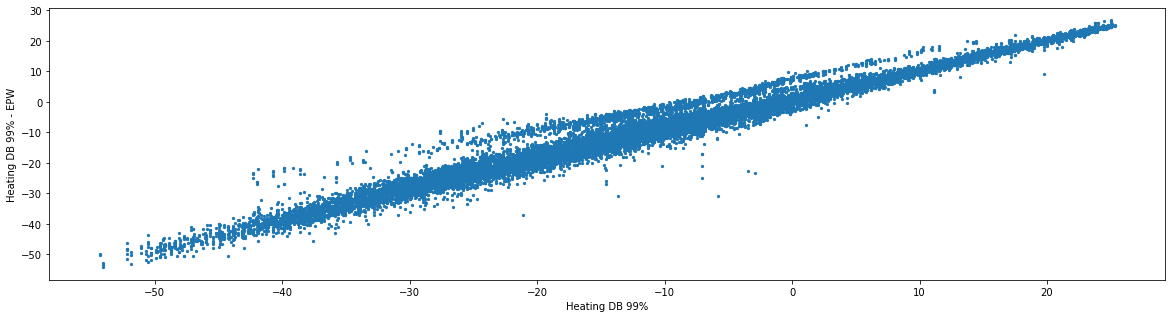

In [84]:
df_results.plot.scatter(x="Heating DB 99%", y="Heating DB 99% - EPW", s=5);

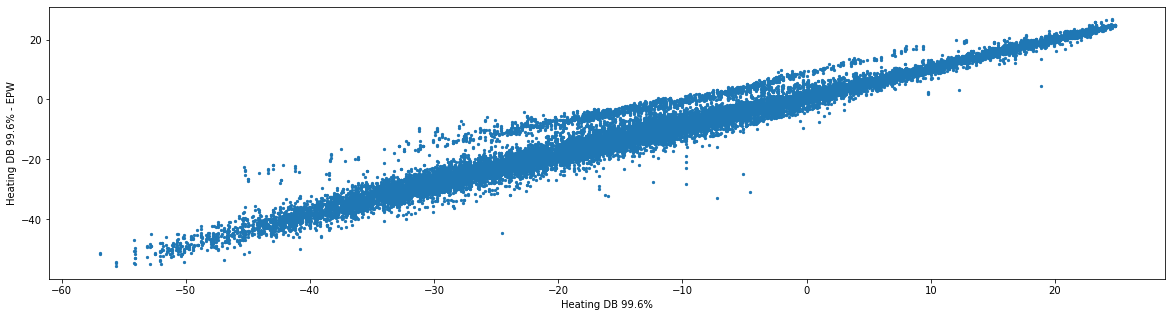

In [85]:
df_results.plot.scatter(x="Heating DB 99.6%", y="Heating DB 99.6% - EPW", s=5);

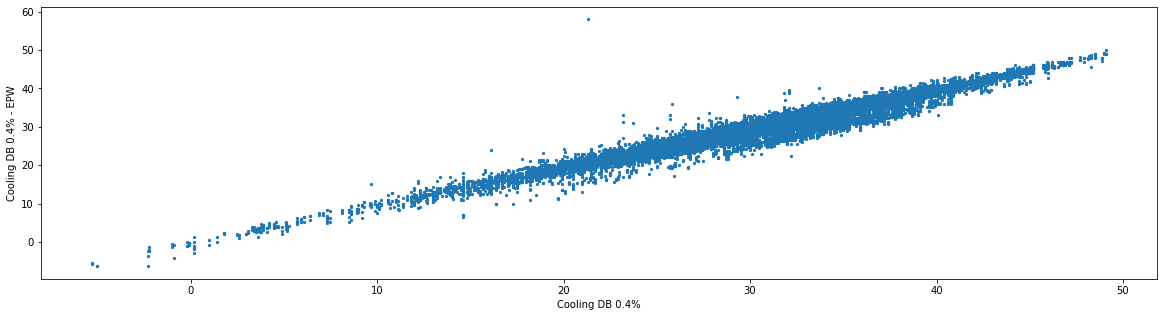

In [86]:
df_results.plot.scatter(x="Cooling DB 0.4%", y="Cooling DB 0.4% - EPW", s=5);

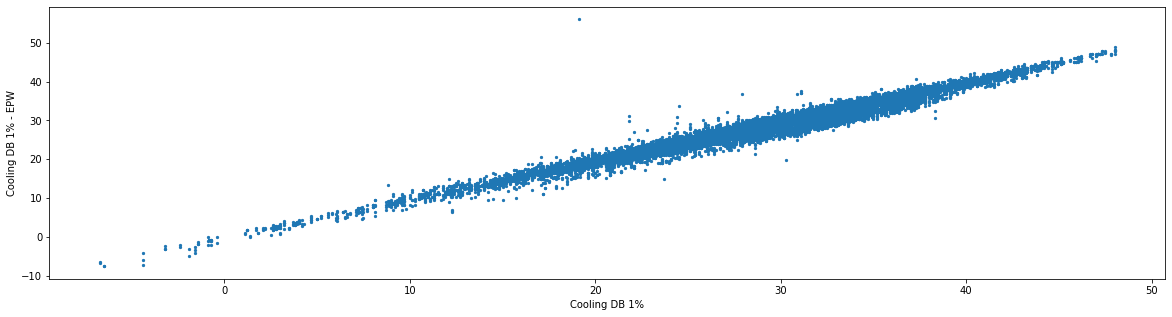

In [87]:
df_results.plot.scatter(x="Cooling DB 1%", y="Cooling DB 1% - EPW", s=5);

In [88]:
#sort by largest to smallest error and plot histogram
df_results= df_results.sort_values(by=['delta - Heating DB 99.6%'], ascending=False)
df_results.head()

,Location Name,Coordinates,URL for files,WMO,last_year,Country,State/Province,Station,WBAN,Latitude,...,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,Region_number,Region,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
30193,Capmon.CS-Saturna.Island BC CAN,"['-123.1281', '48.77530', '178.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/BC_British_Columbia/CAN_BC_Capmon.CS-Saturna.Island.719140_TMYx.zip,719140,TMYx,Canada,BC,SATURNA CAPMON,99999,48.7753N,...,-30.96400,-23.30,22.00,21.00,71,North America,26.36400,20.40,4.70,3.80
3806,Grimsey.Island NE ISL,"['-18.01700', '66.54400', '17.0']",https://climate.onebuilding.org/WMO_Region_6_Europe/ISL_Iceland/NE_Northland_East/ISL_NE_Grimsey.Island.041650_TMYx.zip,41650,TMYx,Iceland,NaN,GRIMSEY AP,99999,66.544N,...,-33.00000,-30.90,11.40,10.20,41,Asia,25.80000,25.10,3.40,3.30
13958,Eagle.AP AK USA,"['-141.1483', '64.77670', '276.8']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/AK_Alaska/USA_AK_Eagle.AP.701975_US.Normals.2006-2020.zip,701975,2020,USA,AK,EAGLE,26422,64.777N,...,-22.56000,-22.11,21.17,20.89,70,North America,22.74000,19.79,6.33,4.81
13939,Bettles.AP AK USA,"['-151.5089', '66.91610', '195.7']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/AK_Alaska/USA_AK_Bettles.AP.701740_US.Normals.1981-2010.zip,701740,2010,USA,AK,BETTLES,26533,66.917N,...,-23.66784,-23.33,20.44,19.89,70,North America,21.53216,18.97,5.56,4.21
14253,King.Salmon.AP AK USA,"['-156.6294', '58.67940', '19.2']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/USA_United_States_of_America/AK_Alaska/USA_AK_King.Salmon.AP.703260_US.Normals.1981-2010.zip,703260,2010,USA,AK,KING SALMON,25503,58.683N,...,-9.67000,-9.44,16.50,16.33,70,North America,21.53000,18.16,6.40,4.47


In [89]:
df_summary = df_results.drop(columns=['Location Name','Coordinates','URL for files','WMO','last_year','Country','State/Province','Station','WBAN','Latitude','Longitude','Heating DB 99.6%','Heating DB 99%','Cooling DB 0.4%', 'Cooling MCWB 0.4%', 'Cooling DB 1%',
       'Cooling MCWB 1%', 'Cooling DB 2%', 'Cooling MCWB 2%',
       'Evaporation WB 0.4%', 'Evaporation MCDB 0.4%', 'Evaporation WB 1%',
       'Evaporation MCDB 1%', 'Evaporation WB 2%', 'Evaporation MCDB 2%',
       'Heating DB 99.6% - EPW', 'Heating DB 99% - EPW',
       'Cooling DB 0.4% - EPW', 'Cooling DB 1% - EPW', 'Region_number'])


In [90]:
cnt_region = df_summary.groupby(["Region"])
cnt_region.describe()

delta - Heating DB 99.6%                                        \
                                 count      mean       std  min     25%  50%   
Region                                                                         
Europe         5681.0                   2.795859  1.928199  0.0  1.2000  2.5   
Asia           6306.0                   1.377338  1.358296  0.0  0.4036  1.0   
Africa         1675.0                   1.233637  1.163006  0.0  0.3000  0.9   
special        11.0                     1.892291  1.582067  0.0  0.7518  1.1   
North America  12656.0                  3.188554  3.557552  0.0  0.9000  2.0   
South America  967.0                    0.990363  1.107764  0.0  0.2036  0.8   
Oceania        3037.0                   0.783772  0.914265  0.0  0.2000  0.5   
other          0.0                     NaN       NaN       NaN  NaN     NaN    

                               delta - Heating DB 99%            ...  \
                  75%      max                  count      mean  ...   
Region                                                           ...   
Europe         4.0144  10.7036  5681.0                 2.264451  ...   
Asia           1.9000  25.8000  6306.0                 1.047596  ...   
Africa         1.9000  9.1964   1675.0                 0.931939  ...   
special        3.0500  4.4900   11.0                   1.659909  ...   
North America  3.7000  26.3640  12656.0                2.576460  ...   
South America  1.2018  11.7000  967.0                  0.781112  ...   
Oceania        0.9964  13.0700  3037.0                 0.621790  ...   
other         NaN     NaN       0.0                   NaN        ...   

              delta - Cooling DB 0.4%          delta - Cooling DB 1%  \
                                  75%      max                 count   
Region                                                                 
Europe         1.7036                  9.8964   5681.0                 
Asia           1.0000                  10.1000  6306.0                 
Africa         1.1000                  5.8000   1675.0                 
special        1.2018                  3.6200   11.0                   
North America  1.6000                  36.7000  12656.0                
South America  1.0000                  5.1000   967.0                  
Oceania        1.0000                  7.3964   3037.0                 
other         NaN                     NaN       0.0                    

                                                                 
                   mean       std  min    25%  50%  75%     max  
Region                                                           
Europe         0.904965  0.704847  0.0  0.300  0.8  1.3  9.400   
Asia           0.558293  0.515839  0.0  0.200  0.4  0.8  9.300   
Africa         0.619423  0.552492  0.0  0.200  0.5  0.9  5.200   
special        0.821818  0.833328  0.1  0.300  0.6  0.8  2.440   
North America  1.006029  1.123050  0.0  0.300  0.6  1.2  36.941  
South America  0.535360  0.519972  0.0  0.109  0.4  0.8  4.200   
Oceania        0.526501  0.540700  0.0  0.200  0.4  0.7  7.659   
other         NaN       NaN       NaN  NaN    NaN  NaN  NaN      

[8 rows x 32 columns]

In [91]:
cnt_region.describe().to_csv('All_Results_Stats.csv')

In [92]:
#For TMYx data only
df_TMY = df_results
df_TMY = df_TMY[df_TMY['last_year'].isin(['TMYx'])]
df_results = df_TMY
df_results

,Location Name,Coordinates,URL for files,WMO,last_year,Country,State/Province,Station,WBAN,Latitude,...,Heating DB 99.6% - EPW,Heating DB 99% - EPW,Cooling DB 0.4% - EPW,Cooling DB 1% - EPW,Region_number,Region,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
30193,Capmon.CS-Saturna.Island BC CAN,"['-123.1281', '48.77530', '178.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/BC_British_Columbia/CAN_BC_Capmon.CS-Saturna.Island.719140_TMYx.zip,719140,TMYx,Canada,BC,SATURNA CAPMON,99999,48.7753N,...,-30.9640,-23.300,22.0000,21.000,71,North America,26.3640,20.400,4.7000,3.800
3806,Grimsey.Island NE ISL,"['-18.01700', '66.54400', '17.0']",https://climate.onebuilding.org/WMO_Region_6_Europe/ISL_Iceland/NE_Northland_East/ISL_NE_Grimsey.Island.041650_TMYx.zip,41650,TMYx,Iceland,NaN,GRIMSEY AP,99999,66.544N,...,-33.0000,-30.900,11.4000,10.200,41,Asia,25.8000,25.100,3.4000,3.300
27729,Brockville-Tackaberry.Thousand.Islands.Rgnl.AP ON CAN,"['-75.75160', '44.63540', '121.4']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/ON_Ontario/CAN_ON_Brockville-Tackaberry.Thousand.Islands.Rgnl.AP.711610_TMYx.zip,711610,TMYx,Canada,ON,BROCKVILLE,99999,44.6354N,...,-44.4820,-37.123,28.3964,26.700,71,North America,19.9820,16.023,1.3036,1.500
30326,Cheticamp.CS NS CAN,"['-60.94722', '46.64500', '44.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/NS_Nova_Scotia/CAN_NS_Cheticamp.CS.719590_TMYx.zip,719590,TMYx,Canada,NS,CHETICAMP CS,99999,46.650N,...,-32.2964,-30.800,23.5964,22.100,71,North America,16.2964,17.100,3.7036,3.800
28905,Evansburg.AgCM AB CAN,"['-115.1170', '53.56700', '819.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/AB_Alberta/CAN_AB_Evansburg.AgCM.714810_TMYx.zip,714810,TMYx,Canada,AB,EVANSBURG2 AGCM,99999,53.573N,...,-15.1000,-12.800,24.2000,23.000,71,North America,16.0000,14.800,1.7000,1.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30116,Glenwood AB CAN,"['-113.5260', '49.33400', '1074.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/AB_Alberta/CAN_AB_Glenwood.718850_TMYx.zip,718850,TMYx,Canada,AB,GLENWOOD,99999,49.334N,...,-28.0000,-24.000,29.3000,27.800,71,North America,0.0000,0.700,0.8000,0.400
30081,Prince.Albert.AP SK CAN,"['-105.6767', '53.21030', '428.2']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/SK_Saskatchewan/CAN_SK_Prince.Albert.AP.718690_TMYx.zip,718690,TMYx,Canada,SK,PRINCE ALBERT,99999,53.2103N,...,-35.0000,-32.000,28.0000,26.000,71,North America,0.0000,0.100,0.8000,1.000
25844,Tibooburra.AP NSW AUS,"['142.0567', '-29.44470', '178.0']",https://climate.onebuilding.org/WMO_Region_5_Southwest_Pacific/AUS_Australia/NSW_New_South_Wales/AUS_NSW_Tibooburra.AP.954850_TMYx.zip,954850,TMYx,Australia,NaN,TIBOOBURRA,99999,29.4447S,...,4.1000,5.400,41.8000,40.441,95,Oceania,0.0000,0.200,0.1000,0.241
29973,Nagagami ON CAN,"['-84.16361', '49.74667', '264.0']",https://climate.onebuilding.org/WMO_Region_4_North_and_Central_America/CAN_Canada/ON_Ontario/CAN_ON_Nagagami.718320_TMYx.zip,718320,TMYx,Canada,ON,NAGAGAMI,99999,49.7467N,...,-35.0000,-32.741,30.0000,28.000,71,North America,0.0000,0.741,1.0000,0.800


In [93]:
filename = 'All_Results_TMYx.csv'
export_csv = df_results.to_csv(filename, index = None, header=True)

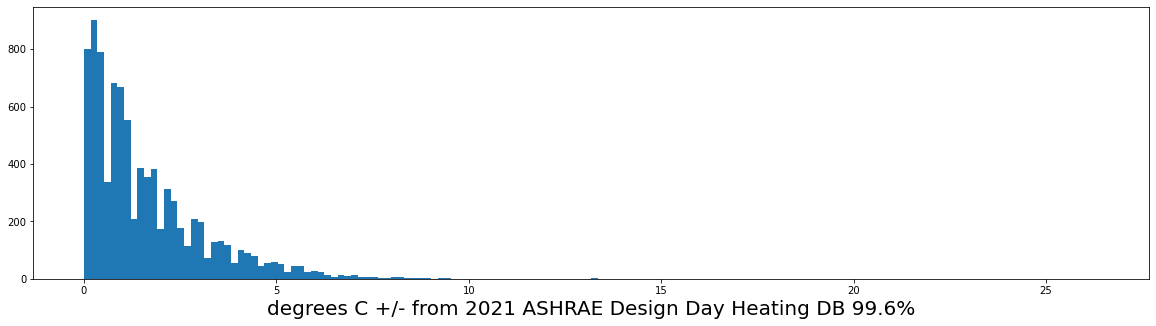

In [94]:
plt.xlabel('degrees C +/- from 2021 ASHRAE Design Day Heating DB 99.6%',fontsize=20)
n, bins, patches = plt.hist(x= df_results['delta - Heating DB 99.6%'], bins='auto')
plt.rcParams['figure.figsize'] = [20, 12]
#plt.xticks(bins)
plt.show()

In [95]:
dist = df_results.drop(df_results.columns[0:31],axis=1)
dist

,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
30193,26.3640,20.400,4.7000,3.800
3806,25.8000,25.100,3.4000,3.300
27729,19.9820,16.023,1.3036,1.500
30326,16.2964,17.100,3.7036,3.800
28905,16.0000,14.800,1.7000,1.400
...,...,...,...,...
30116,0.0000,0.700,0.8000,0.400
30081,0.0000,0.100,0.8000,1.000
25844,0.0000,0.200,0.1000,0.241
29973,0.0000,0.741,1.0000,0.800


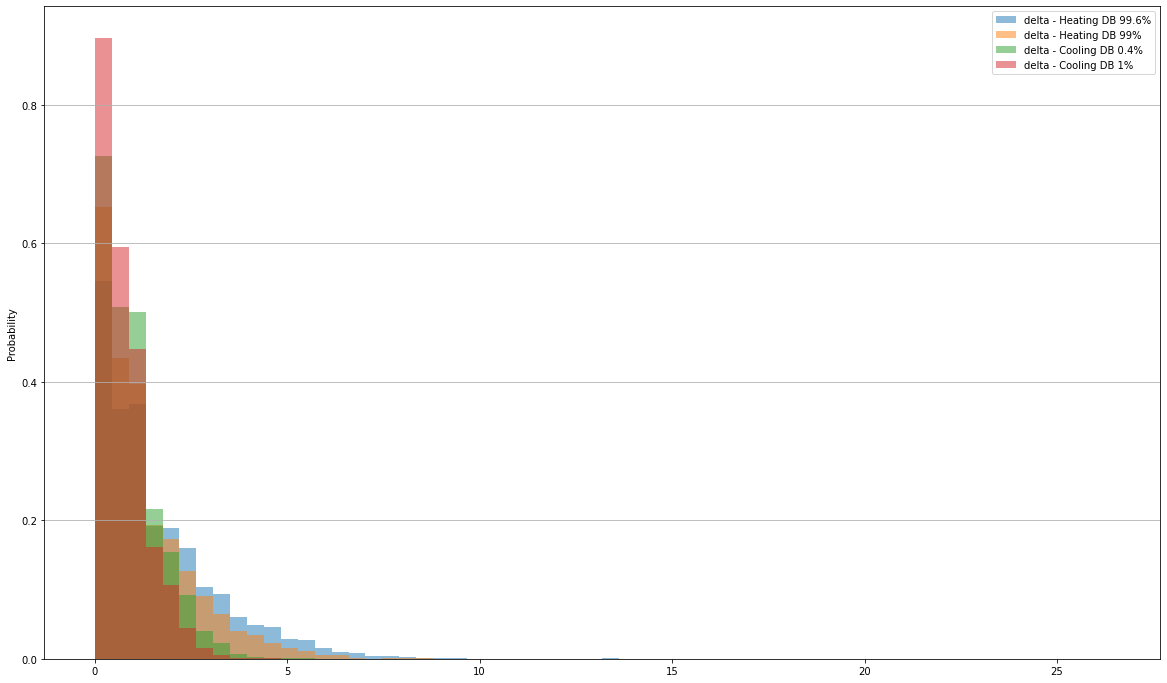

In [96]:
fig, ax = plt.subplots()
##dist.plot.kde(ax=ax, legend=False, title='delta Heating/Cooling DD')
dist.plot.hist(density=True, ax=ax, bins=60, alpha=0.5)
ax.set_ylabel('Probability')
ax.grid(axis='y')
#ax.set_facecolor('#d8dcd6')

In [97]:
dist.describe()

,delta - Heating DB 99.6%,delta - Heating DB 99%,delta - Cooling DB 0.4%,delta - Cooling DB 1%
count,8824.000000,8824.000000,8824.000000,8824.000000
mean,1.628323,1.285678,0.933205,0.738679
std,1.606947,1.311805,0.764612,0.625724
min,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.400000,0.303600,0.259000
50%,1.103600,0.900000,0.800000,0.600000
75%,2.300000,1.800000,1.300000,1.000000
max,26.364000,25.100000,9.703600,10.600000


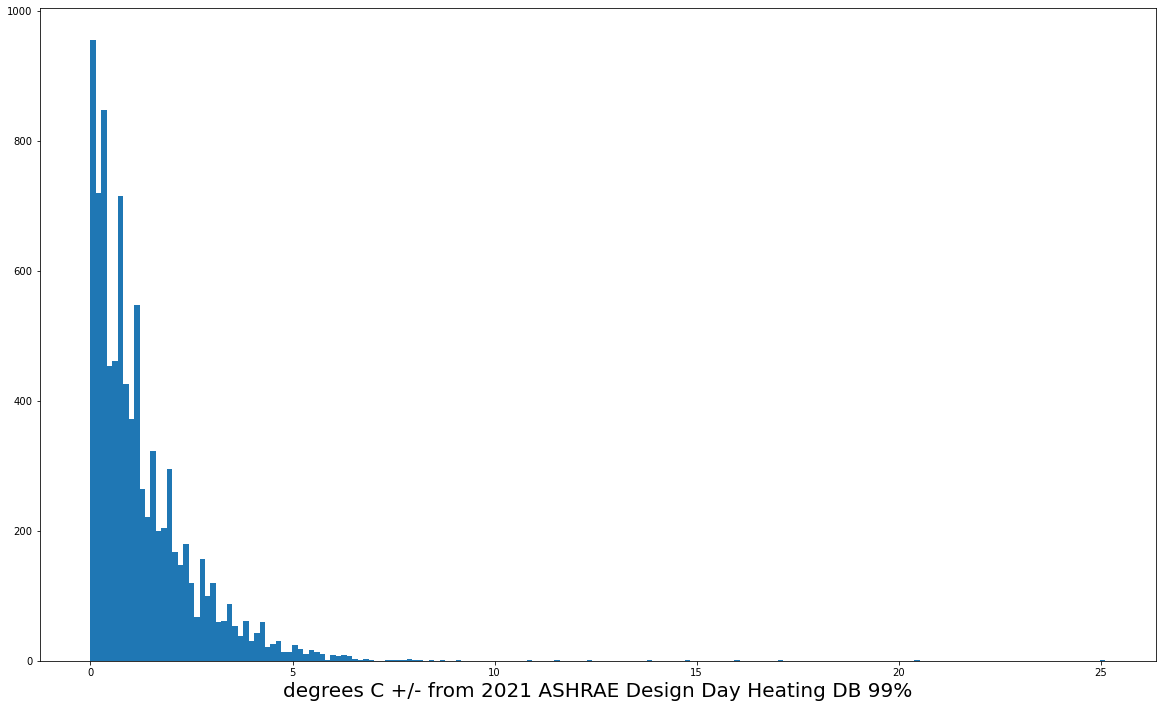

In [98]:
df_results= df_results.sort_values(by=['delta - Heating DB 99%'], ascending=False)
plt.xlabel('degrees C +/- from 2021 ASHRAE Design Day Heating DB 99%',fontsize=20)
plt.hist(x= df_results['delta - Heating DB 99%'], bins='auto')
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

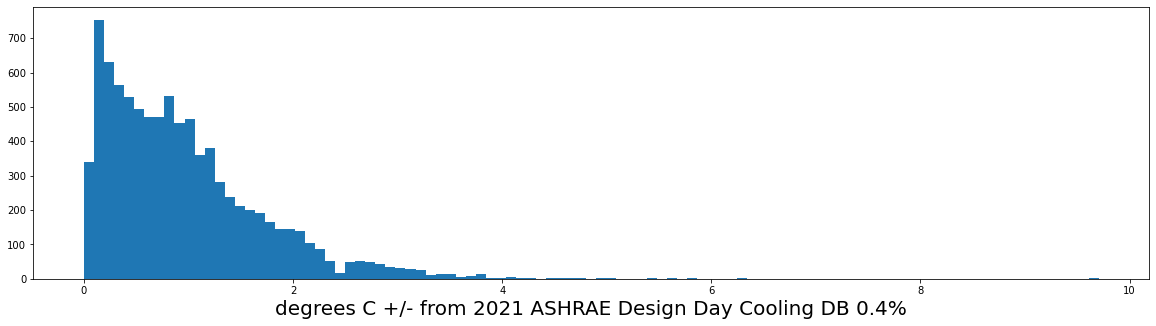

In [99]:
df_results= df_results.sort_values(by=['delta - Cooling DB 0.4%'], ascending=False)
plt.xlabel('degrees C +/- from 2021 ASHRAE Design Day Cooling DB 0.4%',fontsize=20)
plt.hist(x= df_results['delta - Cooling DB 0.4%'], bins='auto')
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

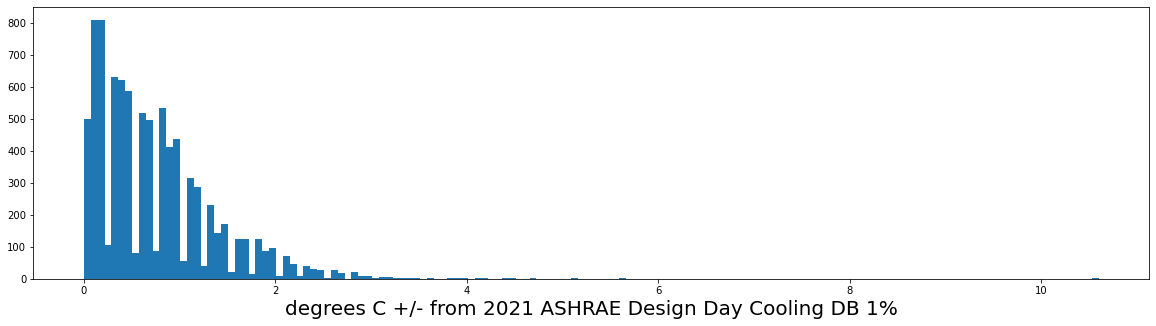

In [100]:
df_results= df_results.sort_values(by=['delta - Cooling DB 1%'], ascending=False)
plt.xlabel('degrees C +/- from 2021 ASHRAE Design Day Cooling DB 1%',fontsize=20)
plt.hist(x= df_results['delta - Cooling DB 1%'], bins='auto')
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

In [101]:
n_by_country = df_results.groupby("Country")["WMO"].count()
n_by_country

Country
Afghanistan          4 
Albania              4 
Algeria              43
American Samoa       1 
Antarctica           45
                     ..
Wallis and Futuna    2 
Western Sahara       1 
Yemen                2 
Zambia               1 
Zimbabwe             2 
Name: WMO, Length: 209, dtype: int64

In [102]:
n_by_region = df_results.groupby("Region")["WMO"].count()
n_by_region

Region
Europe           1974
Asia             2059
Africa           568 
special          3   
North America    2962
South America    317 
Oceania          941 
other            0   
Name: WMO, dtype: int64

In [103]:
df_results.columns

Index(['Location Name', 'Coordinates', 'URL for files', 'WMO', 'last_year',
       'Country', 'State/Province', 'Station', 'WBAN', 'Latitude', 'Longitude',
       'Heating DB 99.6%', 'Heating DB 99%', 'Cooling DB 0.4%',
       'Cooling MCWB 0.4%', 'Cooling DB 1%', 'Cooling MCWB 1%',
       'Cooling DB 2%', 'Cooling MCWB 2%', 'Evaporation WB 0.4%',
       'Evaporation MCDB 0.4%', 'Evaporation WB 1%', 'Evaporation MCDB 1%',
       'Evaporation WB 2%', 'Evaporation MCDB 2%', 'Heating DB 99.6% - EPW',
       'Heating DB 99% - EPW', 'Cooling DB 0.4% - EPW', 'Cooling DB 1% - EPW',
       'Region_number', 'Region', 'delta - Heating DB 99.6%',
       'delta - Heating DB 99%', 'delta - Cooling DB 0.4%',
       'delta - Cooling DB 1%'],
      dtype='object')

In [104]:
df_summary = df_results.drop(columns=['Location Name','Coordinates','URL for files','WMO','last_year','Country','State/Province','Station','WBAN','Latitude','Longitude','Heating DB 99.6%','Heating DB 99%','Cooling DB 0.4%', 'Cooling MCWB 0.4%', 'Cooling DB 1%',
       'Cooling MCWB 1%', 'Cooling DB 2%', 'Cooling MCWB 2%',
       'Evaporation WB 0.4%', 'Evaporation MCDB 0.4%', 'Evaporation WB 1%',
       'Evaporation MCDB 1%', 'Evaporation WB 2%', 'Evaporation MCDB 2%',
       'Heating DB 99.6% - EPW', 'Heating DB 99% - EPW',
       'Cooling DB 0.4% - EPW', 'Cooling DB 1% - EPW', 'Region_number'])


In [105]:
cnt_region = df_summary.groupby(["Region"])
cnt_region.describe()

delta - Heating DB 99.6%                                   \
                                 count      mean       std  min     25%   
Region                                                                    
Europe         1974.0                   2.453343  1.824617  0.0  0.9937   
Asia           2059.0                   1.265709  1.372154  0.0  0.4000   
Africa         568.0                    1.154204  1.125856  0.0  0.3000   
special        3.0                      1.400000  1.081665  0.5  0.8000   
North America  2962.0                   1.775304  1.628565  0.0  0.7000   
South America  317.0                    0.963353  1.145614  0.0  0.2000   
Oceania        941.0                    0.739324  0.838566  0.0  0.2000   
other          0.0                     NaN       NaN       NaN  NaN       

                                       delta - Heating DB 99%            ...  \
                  50%     75%      max                  count      mean  ...   
Region                                                                   ...   
Europe         2.1000  3.6036  9.3036   1974.0                 1.926066  ...   
Asia           0.9000  1.7000  25.8000  2059.0                 0.971009  ...   
Africa         0.8000  1.7000  9.1964   568.0                  0.877227  ...   
special        1.1000  1.8500  2.6000   3.0                    1.266667  ...   
North America  1.4036  2.4000  26.3640  2962.0                 1.435883  ...   
South America  0.7000  1.2000  11.7000  317.0                  0.769095  ...   
Oceania        0.5000  0.9000  5.5072   941.0                  0.578649  ...   
other         NaN     NaN     NaN       0.0                   NaN        ...   

              delta - Cooling DB 0.4%         delta - Cooling DB 1%            \
                                  75%     max                 count      mean   
Region                                                                          
Europe         1.9000                  5.4000  1974.0                1.014120   
Asia           1.2000                  4.5000  2059.0                0.709188   
Africa         1.2036                  5.8000  568.0                 0.749565   
special        1.6500                  2.3000  3.0                   1.200000   
North America  1.2000                  9.7036  2962.0                0.655062   
South America  1.1000                  2.9000  317.0                 0.628716   
Oceania        0.9000                  3.4000  941.0                 0.517601   
other         NaN                     NaN      0.0                  NaN         

                                                       
                    std  min    25%  50%    75%   max  
Region                                                 
Europe         0.708001  0.0  0.441  0.9  1.500  4.7   
Asia           0.587009  0.0  0.259  0.6  1.000  4.5   
Africa         0.610466  0.0  0.300  0.6  1.100  5.1   
special        1.058301  0.4  0.600  0.8  1.600  2.4   
North America  0.591347  0.0  0.200  0.5  0.900  10.6  
South America  0.539731  0.0  0.200  0.5  0.959  2.9   
Oceania        0.452543  0.0  0.200  0.4  0.700  3.6   
other         NaN       NaN  NaN    NaN  NaN    NaN    

[8 rows x 32 columns]

In [106]:
cnt_region.describe().to_csv('All_Results_TMYx_Stats.csv')

Europe           AxesSubplot(0.1,0.679412;0.235294x0.220588)     
Asia             AxesSubplot(0.382353,0.679412;0.235294x0.220588)
Africa           AxesSubplot(0.664706,0.679412;0.235294x0.220588)
special          AxesSubplot(0.1,0.414706;0.235294x0.220588)     
North America    AxesSubplot(0.382353,0.414706;0.235294x0.220588)
South America    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
Oceania          AxesSubplot(0.1,0.15;0.235294x0.220588)         
other            AxesSubplot(0.382353,0.15;0.235294x0.220588)    
dtype: object

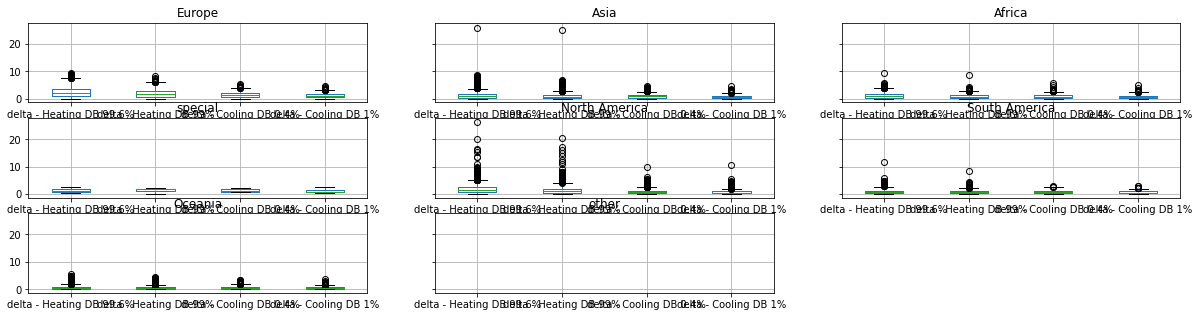

In [107]:
df_summary.groupby(["Region"]).boxplot()

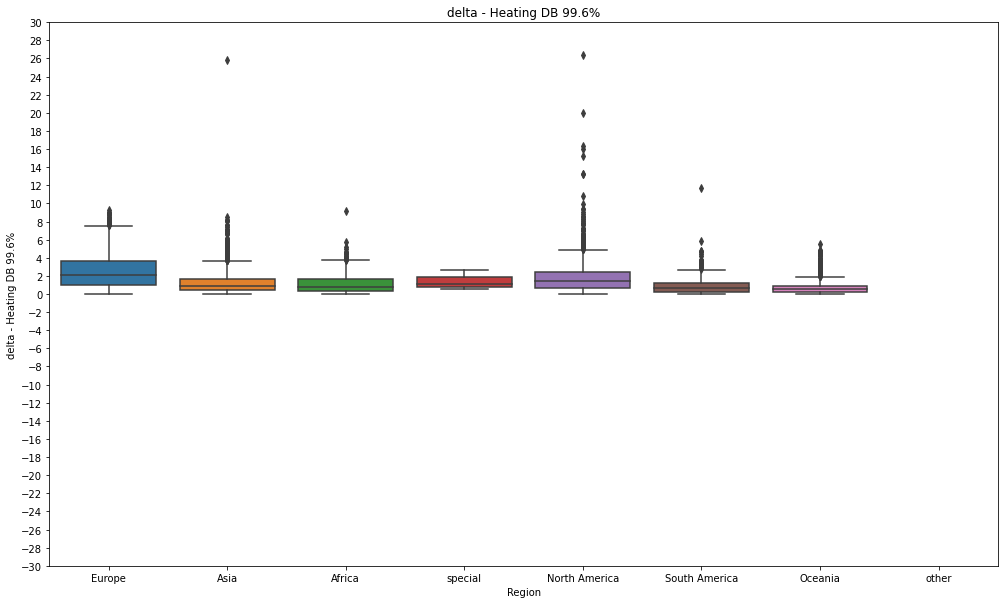

In [108]:
plt.figure(figsize=(17,10))
ax = sns.boxplot(x="Region",y='delta - Heating DB 99.6%', data=df_summary)
ax.set( yticks=np.arange(-30,32,2))
plt.title('delta - Heating DB 99.6%')

plt.show()

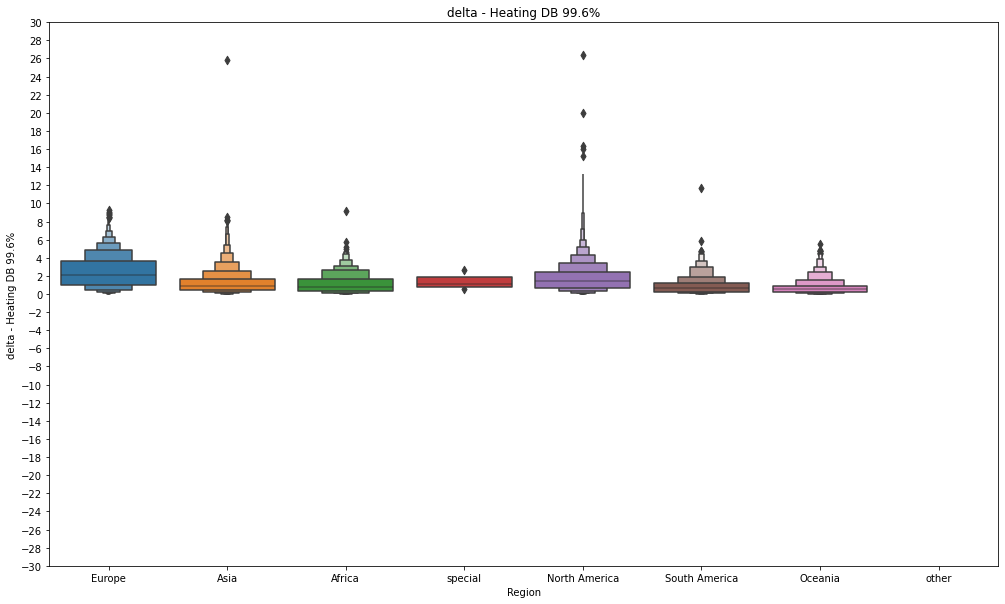

In [109]:
plt.figure(figsize=(17,10))
ax = sns.boxenplot(x="Region",y='delta - Heating DB 99.6%', data=df_summary)
ax.set( yticks=np.arange(-30,32,2))
plt.title('delta - Heating DB 99.6%')

plt.show()

<AxesSubplot:title={'center':'delta - Heating DB 99.6%'}, xlabel='Region'>

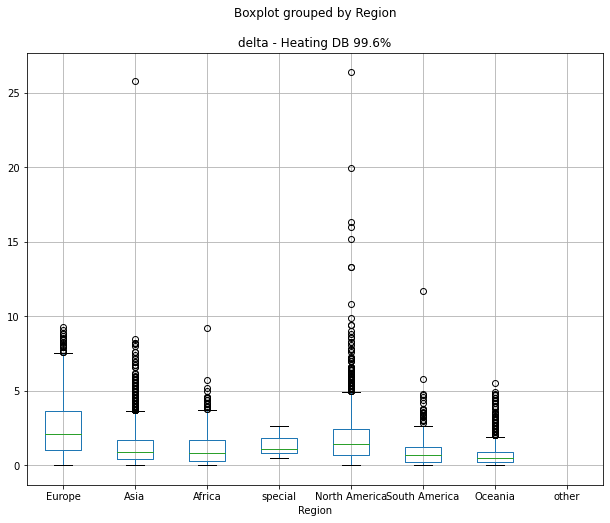

In [110]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df_summary.boxplot(column=['delta - Heating DB 99.6%'], by='Region', ax=ax)